In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [4]:

import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted

data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  font = str(i+1).zfill(2) + '. ' + d['font']
  for j in range(n):
    data.append([font, values[j]])
  
df = pd.DataFrame(data, columns=['Font', 'Value'])
print(df)

                   Font      Value
0       01. Baskerville  26.530875
1       01. Baskerville  25.497878
2       01. Baskerville  24.741493
3       01. Baskerville  24.939610
4       01. Baskerville  25.866675
5       01. Baskerville  23.818981
6       01. Baskerville  25.989542
7       01. Baskerville  25.341838
8       01. Baskerville  27.121184
9       01. Baskerville  25.112604
10      01. Baskerville  25.330748
11      01. Baskerville  24.423636
12      01. Baskerville  25.273358
13      01. Baskerville  23.976369
14      01. Baskerville  26.648277
15      01. Baskerville  26.081413
16      01. Baskerville  24.149537
17      01. Baskerville  24.770287
18      01. Baskerville  24.514887
19      01. Baskerville  26.327654
20      01. Baskerville  25.447297
21      01. Baskerville  25.743923
22      01. Baskerville  25.866824
23      01. Baskerville  24.640581
24      01. Baskerville  25.148285
25      01. Baskerville  25.900182
26      01. Baskerville  25.497900
27      01. Baskervi

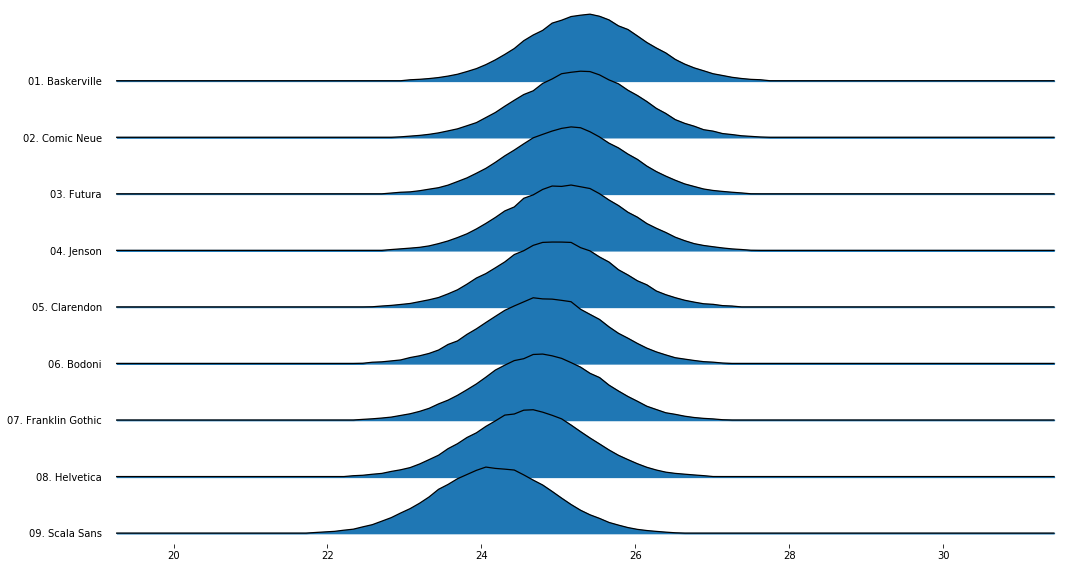

In [6]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Font", 
                          grid=False, linewidth=1.25, x_range=[19.2,31.5],
                          legend=False, overlap=0.5, figsize=(15,8), kind="counts", bins=100)

fig.savefig("rank_general.svg")
